<a href="https://colab.research.google.com/github/GuiMM27/GS-DYN/blob/main/GS_DYNPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📓 Célula 1: Imports e Dataset

In [10]:
import random
import time
import sys
from collections import deque
import itertools

# Aumenta o limite de recursão para buscas profundas
sys.setrecursionlimit(2000)

# --- Conjunto de Dados Mestre (Base) ---
DATASET_MESTRE = {
    'S1': {'Nome': 'Programação Básica (Python)', 'Tempo': 80, 'Valor': 3, 'Complexidade': 4, 'Pre_Reqs': [], 'Uso': 'Base'},
    'S2': {'Nome': 'Modelagem de Dados (SQL)', 'Tempo': 60, 'Valor': 4, 'Complexidade': 3, 'Pre_Reqs': [], 'Uso': 'Base'},
    'S3': {'Nome': 'Algoritmos Avançados', 'Tempo': 100, 'Valor': 7, 'Complexidade': 8, 'Pre_Reqs': ['S1'], 'Uso': 'Crítica (HC1)'},
    'S4': {'Nome': 'Fundamentos de ML', 'Tempo': 120, 'Valor': 8, 'Complexidade': 9, 'Pre_Reqs': ['S1', 'S3'], 'Uso': 'Não Crítica'},
    'S5': {'Nome': 'Visualização de Dados (BI)', 'Tempo': 40, 'Valor': 6, 'Complexidade': 5, 'Pre_Reqs': ['S2'], 'Uso': 'Crítica (HC2)'},
    'S6': {'Nome': 'IA Generativa Ética', 'Tempo': 150, 'Valor': 10, 'Complexidade': 10, 'Pre_Reqs': ['S4'], 'Uso': 'Objetivo Final'},
    'S7': {'Nome': 'Estruturas em Nuvem (AWS/Azure)', 'Tempo': 70, 'Valor': 5, 'Complexidade': 7, 'Pre_Reqs': [], 'Uso': 'Crítica (HC3)'},
    'S8': {'Nome': 'APIs e Microsserviços', 'Tempo': 90, 'Valor': 6, 'Complexidade': 6, 'Pre_Reqs': ['S1'], 'Uso': 'Crítica (HC4)'},
    'S9': {'Nome': 'DevOps & CI/CD', 'Tempo': 110, 'Valor': 9, 'Complexidade': 8, 'Pre_Reqs': ['S7', 'S8'], 'Uso': 'Crítica (HC5)'},
    'H10': {'Nome': 'Segurança de Dados', 'Tempo': 60, 'Valor': 5, 'Complexidade': 6, 'Pre_Reqs': [], 'Uso': 'Lista Grande'},
    'H11': {'Nome': 'Análise de Big Data', 'Tempo': 90, 'Valor': 8, 'Complexidade': 8, 'Pre_Reqs': ['S4'], 'Uso': 'Lista Grande'},
    'H12': {'Nome': 'Introdução a IoT', 'Tempo': 30, 'Valor': 3, 'Complexidade': 3, 'Pre_Reqs': [], 'Uso': 'Lista Grande'}
}

print("Célula 1: Imports e Dataset carregados.")

Célula 1: Imports e Dataset carregados.


📓 Célula 2: Classe MOH (Parte 1: Init e Validação)

In [11]:
class MotorOrientacaoHabilidades:
    """
    Implementação do Motor de Orientação de Habilidades (MOH)
    """

    def __init__(self, dataset):
        """
        Inicializa o MOH com as estruturas de dados obrigatórias.
        """
        self.metadata = {}
        self.all_skills = set()
        self._load_dataset(dataset)
        print(f"Dataset carregado com {len(self.all_skills)} habilidades.")

    def _load_dataset(self, dataset):
        """Carrega o conjunto de dados mestre nas estruturas."""
        print("Carregando dataset...")
        for skill_id, data in dataset.items():
            self.all_skills.add(skill_id)
            self.metadata[skill_id] = {
                'Nome': data['Nome'],
                'Tempo': data['Tempo'],
                'Valor': data['Valor'],
                'Complexidade': data['Complexidade'],
                'Pre_Reqs': data.get('Pre_Reqs', []),
                'Uso': data['Uso']
            }

    # --- VALIDAÇÃO DO GRAFO (Obrigatório) ---

    def validar_grafo(self):
        """
        Executa as rotinas de verificação obrigatórias: ciclos e órfãos.
        """
        print("\n--- INICIANDO VALIDAÇÃO DO GRAFO ---")

        # 1. Detecção de Nós Órfãos
        orfãos = self.detectar_nos_orfaos()
        if orfãos:
            print(f"[ERRO DE VALIDAÇÃO] Nós órfãos detectados: {orfãos}")
            return False
        else:
            print("[VALIDAÇÃO OK] Nenhum nó órfão detectado.")

        # 2. Detecção de Ciclos
        if self.detectar_ciclo():
            print(f"[ERRO DE VALIDAÇÃO] Ciclo detectado no grafo.")
            return False
        else:
            print("[VALIDAÇÃO OK] Nenhum ciclo detectado (Grafo Acíclico Direcionado - DAG).")

        print("--- VALIDAÇÃO DO GRAFO CONCLUÍDA: SUCESSO ---")
        return True

    def detectar_nos_orfaos(self):
        """Verifica se todos os pré-requisitos listados existem."""
        orfãos = set()
        for skill_id in self.all_skills:
            for req_id in self.metadata[skill_id].get('Pre_Reqs', []):
                if req_id not in self.all_skills:
                    orfãos.add(req_id)
        return list(orfãos)

    def detectar_ciclo(self):
        """Usa DFS para detectar ciclos."""
        visitado = set()
        visitando = set()

        for no in self.all_skills:
            if no not in visitado:
                if self._dfs_ciclo_util(no, visitado, visitando):
                    return True
        return False

    def _dfs_ciclo_util(self, no, visitado, visitando):
        visitado.add(no)
        visitando.add(no)

        for pre_req in self.metadata[no].get('Pre_Reqs', []):
            if pre_req not in visitado:
                if self._dfs_ciclo_util(pre_req, visitado, visitando):
                    return True
            elif pre_req in visitando:
                return True

        visitando.remove(no)
        return False

    def get_todas_dependencias(self, skill_id):
        """
        Retorna o conjunto de TODAS as habilidades necessárias para 'skill_id'.
        """
        deps_finais = set()
        fila = deque(self.metadata[skill_id].get('Pre_Reqs', []))

        while fila:
            atual = fila.popleft()
            if atual in deps_finais:
                continue
            deps_finais.add(atual)
            for req_pai in self.metadata[atual].get('Pre_Reqs', []):
                if req_pai not in deps_finais:
                    fila.append(req_pai)
        return deps_finais

print("Célula 2: Classe MOH (Parte 1: Init e Validação) definida.")

Célula 2: Classe MOH (Parte 1: Init e Validação) definida.


📓 Célula 3: Classe MOH (Parte 2: Desafio 1 - Knapsack)

In [21]:
# --- DESAFIO 1: Caminho de Valor Máximo ---

def resolver_desafio1_deterministico(self, alvo_id, max_tempo, max_complex, adquiridas):
    print(f"\n--- DESAFIO 1 (Determinístico) ---")
    print(f"Buscando caminho para '{alvo_id}' com T<={max_tempo}, C<={max_complex}")
    necessarias = self.get_todas_dependencias(alvo_id)
    necessarias.add(alvo_id)
    itens_a_adquirir = list(necessarias - adquiridas)
    n = len(itens_a_adquirir)
    if not itens_a_adquirir:
        print(f"Todas as habilidades necessárias para '{alvo_id}' já foram adquiridas.")
        return 0, []
    print(f"Habilidades a considerar para o Knapsack: {itens_a_adquirir}")
    memo = {}
    def knapsack_dp(index, tempo_restante, complex_restante):
        estado = (index, tempo_restante, complex_restante)
        if index == n: return 0, []
        if estado in memo: return memo[estado]
        max_val, skills_path = knapsack_dp(index + 1, tempo_restante, complex_restante)
        skill_id = itens_a_adquirir[index]
        item_t, item_c, item_v = self.metadata[skill_id]['Tempo'], self.metadata[skill_id]['Complexidade'], self.metadata[skill_id]['Valor']
        if tempo_restante >= item_t and complex_restante >= item_c:
            val_com_item, path_com_item = knapsack_dp(index + 1, tempo_restante - item_t, complex_restante - item_c)
            val_com_item += item_v
            if val_com_item > max_val:
                max_val, skills_path = val_com_item, path_com_item + [skill_id]
        memo[estado] = (max_val, skills_path)
        return max_val, skills_path
    valor_total, caminho = knapsack_dp(0, max_tempo, max_complex)
    print(f"[Resultado Determinístico] Valor Máximo: {valor_total}")
    print(f"[Caminho Selecionado] {caminho}")
    if alvo_id not in caminho and alvo_id not in adquiridas:
          print(f"[AVISO] O alvo '{alvo_id}' não pôde ser incluído no caminho ótimo dadas as restrições.")

    # MUDANÇA: Retorna o valor para o gráfico
    return valor_total, caminho

def resolver_desafio1_monte_carlo(self, alvo_id, max_tempo, max_complex, adquiridas, n_simulacoes=1000):
    print(f"\n--- DESAFIO 1 (Simulação Monte Carlo) ---")
    necessarias = self.get_todas_dependencias(alvo_id)
    necessarias.add(alvo_id)
    itens_a_adquirir = list(necessarias - adquiridas)
    n = len(itens_a_adquirir)
    if not itens_a_adquirir:
        print("Nenhuma habilidade nova a simular.")
        return 0, 0
    print(f"Executando {n_simulacoes} cenários para {n} habilidades...")
    resultados_valores = []
    for _ in range(n_simulacoes):
        valores_simulados = {}
        for skill_id in itens_a_adquirir:
            v_base = self.metadata[skill_id]['Valor']
            v_min, v_max = v_base * 0.90, v_base * 1.10
            valores_simulados[skill_id] = random.uniform(v_min, v_max)
        memo = {}
        def knapsack_dp_mc(index, tempo_restante, complex_restante):
            estado = (index, tempo_restante, complex_restante)
            if index == n: return 0
            if estado in memo: return memo[estado]
            max_val = knapsack_dp_mc(index + 1, tempo_restante, complex_restante)
            skill_id = itens_a_adquirir[index]
            item_t, item_c = self.metadata[skill_id]['Tempo'], self.metadata[skill_id]['Complexidade']
            item_v = valores_simulados[skill_id]
            if tempo_restante >= item_t and complex_restante >= item_c:
                val_com_item = knapsack_dp_mc(index + 1, tempo_restante - item_t, complex_restante - item_c)
                val_com_item += item_v
                max_val = max(max_val, val_com_item)
            memo[estado] = max_val
            return max_val
        valor_simulado = knapsack_dp_mc(0, max_tempo, max_complex)
        resultados_valores.append(valor_simulado)
    valor_esperado = sum(resultados_valores) / len(resultados_valores)
    soma_quadrados_diff = sum((x - valor_esperado) ** 2 for x in resultados_valores)
    if len(resultados_valores) > 1:
        desvio_padrao = (soma_quadrados_diff / (len(resultados_valores) - 1)) ** 0.5
    else: desvio_padrao = 0.0
    print(f"[Resultado Monte Carlo] Valor Esperado E[V]: {valor_esperado:.2f}")
    print(f"[Resultado Monte Carlo] Desvio Padrão (stdev): {desvio_padrao:.2f}")

    # MUDANÇA: Retorna a lista de 1000 valores para o gráfico
    return resultados_valores

MotorOrientacaoHabilidades.resolver_desafio1_deterministico = resolver_desafio1_deterministico
MotorOrientacaoHabilidades.resolver_desafio1_monte_carlo = resolver_desafio1_monte_carlo
print("Célula 3: Classe MOH (Parte 2: Desafio 1) definida (COM RETORNO DE DADOS).")

Célula 3: Classe MOH (Parte 2: Desafio 1) definida (COM RETORNO DE DADOS).


📓 Célula 4: Classe MOH (Parte 3: Desafio 4 - Sorting)

In [13]:
# --- DESAFIO 4: Trilhas Paralelas ---

def _implementacao_merge_sort(self, lista_tuplas):
    """
    Implementação do Merge Sort para ordenar tuplas (skill_id, complexidade).
    """
    if len(lista_tuplas) <= 1:
        return lista_tuplas

    meio = len(lista_tuplas) // 2
    esquerda = self._implementacao_merge_sort(lista_tuplas[:meio])
    direita = self._implementacao_merge_sort(lista_tuplas[meio:])

    resultado = []
    i, j = 0, 0
    while i < len(esquerda) and j < len(direita):
        if esquerda[i][1] <= direita[j][1]: # Compara pela complexidade (índice 1)
            resultado.append(esquerda[i])
            i += 1
        else:
            resultado.append(direita[j])
            j += 1

    resultado.extend(esquerda[i:])
    resultado.extend(direita[j:])
    return resultado

def resolver_desafio4(self):
    """
    Ordena as 12 habilidades por complexidade C.
    """
    print("\n--- DESAFIO 4 (Trilhas Paralelas - Sorting) ---")
    print("Justificativa: Merge Sort. Complexidade garantida O(n log n).")

    habilidades_com_c = []
    for skill_id in self.all_skills:
        c = self.metadata[skill_id]['Complexidade']
        habilidades_com_c.append((skill_id, c))

    # 1. Medir tempo da implementação própria (Merge Sort)
    start_time_proprio = time.perf_counter()
    ordenado_proprio_tuplas = self._implementacao_merge_sort(habilidades_com_c.copy())
    end_time_proprio = time.perf_counter()
    tempo_proprio = (end_time_proprio - start_time_proprio) * 1000

    print(f"[Merge Sort Próprio] Tempo: {tempo_proprio:.6f} ms")

    # 2. Medir tempo da implementação nativa
    start_time_nativo = time.perf_counter()
    ordenado_nativo_tuplas = sorted(habilidades_com_c.copy(), key=lambda item: item[1])
    end_time_nativo = time.perf_counter()
    tempo_nativo = (end_time_nativo - start_time_nativo) * 1000

    print(f"[Sort Nativo (Timsort)] Tempo: {tempo_nativo:.6f} ms")

    # 3. Extrair IDs e dividir em Sprints
    ordenado_nativo_ids = [skill_id for skill_id, c in ordenado_nativo_tuplas]

    meio = len(ordenado_nativo_ids) // 2
    sprint_a = ordenado_nativo_ids[:meio]
    sprint_b = ordenado_nativo_ids[meio:]

    print(f"\nSprint A (1-{meio}): {sprint_a}")
    print(f"Sprint B ({meio+1}-{len(ordenado_nativo_ids)}): {sprint_b}")

    print("\nLista Ordenada por Complexidade (C):")
    for skill_id, c in ordenado_nativo_tuplas:
        print(f"  {skill_id} ({self.metadata[skill_id]['Nome']}): C={c}")

    return tempo_proprio, tempo_nativo, ordenado_nativo_ids

# Adiciona os métodos na classe
MotorOrientacaoHabilidades._implementacao_merge_sort = _implementacao_merge_sort
MotorOrientacaoHabilidades.resolver_desafio4 = resolver_desafio4

print("Célula 4: Classe MOH (Parte 3: Desafio 4) definida.")

Célula 4: Classe MOH (Parte 3: Desafio 4) definida.


📓 Célula 5: Classe MOH (Parte 4: Desafio 2, 3 e 5)

In [14]:
# --- DESAFIO 2: Verificação Crítica ---

def calcular_custo_ordem(self, ordem, adquiridas_inicial):
    """
    Calcula o custo total (Tempo) para adquirir uma sequência de habilidades,
    incluindo o tempo de espera por pré-requisitos.
    (Função auxiliar não utilizada na lógica final, mantida para referência).
    """
    pass


def resolver_desafio2(self, adquiridas_inicial):
    """
    Enumera as 120 permutações das 5 Habilidades Críticas e calcula o custo.
    """
    print("\n--- DESAFIO 2 (Verificação Crítica) ---")

    # 1. Validação do Grafo
    if not self.validar_grafo():
          print("[ERRO Desafio 2] Grafo inválido, interrompendo.")
          return

    habilidades_criticas = ['S3', 'S5', 'S7', 'S8', 'S9']

    # Lógica de custo: Aquisição sequencial na ordem dada.
    # O custo de uma habilidade inclui os pré-requisitos dela
    # SE eles ainda não foram adquiridos na simulação.

    resultados = []

    for ordem in itertools.permutations(habilidades_criticas):
        tempo_total_ordem = 0
        adquiridas_simulacao = set(adquiridas_inicial)

        for skill_id in ordem:
            # 1. Custo dos pré-requisitos que FALTAM
            custo_prereqs = 0
            fila_prereqs = deque(self.metadata[skill_id].get('Pre_Reqs', []))

            while fila_prereqs:
                req = fila_prereqs.popleft()
                if req not in adquiridas_simulacao:
                    # Adiciona o custo e os pré-reqs do pré-req
                    custo_prereqs += self.metadata[req]['Tempo']
                    adquiridas_simulacao.add(req) # Marca como adquirido na simulação
                    for sub_req in self.metadata[req].get('Pre_Reqs', []):
                        if sub_req not in adquiridas_simulacao:
                            fila_prereqs.append(sub_req)

            # 2. Custo da própria habilidade (só se ela não foi pega como pré-req)
            custo_habilidade = 0
            if skill_id not in adquiridas_simulacao:
                custo_habilidade = self.metadata[skill_id]['Tempo']

            tempo_total_ordem += custo_prereqs + custo_habilidade
            adquiridas_simulacao.add(skill_id) # Garante que a HC principal foi adquirida

        resultados.append((ordem, tempo_total_ordem))

    # Ordena os resultados pelo tempo (custo)
    resultados.sort(key=lambda x: x[1])

    print(f"Total de permutações calculadas: {len(resultados)}")

    print("\n--- 3 Melhores Ordens (Menor Custo de Tempo) ---")
    for i in range(3):
        print(f"{i+1}. Ordem: {resultados[i][0]} -> Custo Total (Tempo): {resultados[i][1]}h")

    print("\n--- 3 Piores Ordens (Maior Custo de Tempo) ---")
    for i in range(-1, -4, -1):
        print(f"{len(resultados)+i+1}. Ordem: {resultados[i][0]} -> Custo Total (Tempo): {resultados[i][1]}h")

    # --- JUSTIFICATIVA ATUALIZADA ---
    print("\nJustificativa da Heurística:")
    print("A análise das 120 permutações mostra um resultado contra-intuitivo: todas as ordens têm o custo total de 550h.")
    print("Isso ocorre porque nossa lógica de custo soma o 'Tempo de Aquisição' de cada habilidade e seus pré-requisitos únicos *exatamente uma vez*.")
    print("Como todas as 5 HCs (e seus pré-reqs S1 e S2) devem ser adquiridas, o custo total é sempre a soma de S1+S2+S3+S5+S7+S8+S9, que é 550h, independentemente da ordem.")

    return resultados


# Adiciona os métodos na classe
MotorOrientacaoHabilidades.calcular_custo_ordem = calcular_custo_ordem
MotorOrientacaoHabilidades.resolver_desafio2 = resolver_desafio2
# Removidos os stubs de desafio 3 e 5

print("Célula 5: Classe MOH (Parte 4: Desafio 2) definida.")

Célula 5: Classe MOH (Parte 4: Desafio 2) definida.


📓 Célula 6: Classe MOH (Parte 5: Desafio 3 - Guloso vs. Exaustivo)

In [22]:
# --- DESAFIO 3: Pivô Mais Rápido ---

def _desafio3_guloso(self, base_skills, valor_alvo):
    skills_com_ratio = []
    for skill_id in base_skills:
        v = self.metadata[skill_id]['Valor']
        t = self.metadata[skill_id]['Tempo']
        ratio = v / t if t > 0 else 0
        skills_com_ratio.append((skill_id, v, t, ratio))
    skills_com_ratio.sort(key=lambda x: x[3], reverse=True)
    valor_total, tempo_total = 0, 0
    caminho_guloso = []
    for skill_id, v, t, ratio in skills_com_ratio:
        if valor_total >= valor_alvo: break
        valor_total += v
        tempo_total += t
        caminho_guloso.append(skill_id)
    return valor_total, tempo_total, caminho_guloso

def _desafio3_exaustivo(self, base_skills, valor_alvo):
    solucao_otima = {'tempo': float('inf'), 'valor': 0, 'caminho': []}
    for r in range(1, len(base_skills) + 1):
        for combo in itertools.combinations(base_skills, r):
            valor_combo, tempo_combo = 0, 0
            for skill_id in combo:
                valor_combo += self.metadata[skill_id]['Valor']
                tempo_combo += self.metadata[skill_id]['Tempo']
            if valor_combo >= valor_alvo:
                if tempo_combo < solucao_otima['tempo']:
                    solucao_otima = {'tempo': tempo_combo, 'valor': valor_combo, 'caminho': list(combo)}
    return solucao_otima['valor'], solucao_otima['tempo'], solucao_otima['caminho']

def resolver_desafio3(self, valor_alvo=15):
    print(f"\n--- DESAFIO 3 (Pivô Mais Rápido) ---")
    print(f"Objetivo: Atingir Valor (S) >= {valor_alvo} com habilidades 'Base'.")
    base_skills = [s_id for s_id in self.all_skills if not self.metadata[s_id].get('Pre_Reqs', [])]
    print(f"Habilidades Base encontradas: {base_skills}")
    v_guloso, t_guloso, p_guloso = self._desafio3_guloso(base_skills, valor_alvo)
    print("\n[Resultado (Guloso V/T)]")
    print(f"  Caminho: {p_guloso}")
    print(f"  Valor: {v_guloso} | Tempo: {t_guloso}h")
    v_otimo, t_otimo, p_otimo = self._desafio3_exaustivo(base_skills, valor_alvo)
    print("\n[Resultado (Busca Exaustiva - Ótima)]")
    print(f"  Caminho: {p_otimo}")
    print(f"  Valor: {v_otimo} | Tempo: {t_otimo}h")
    if t_guloso == t_otimo:
        print("\n[Análise] O algoritmo Guloso ENCONTROU a solução ótima para este dataset.")
    else:
        print(f"\n[Análise] O Guloso (T={t_guloso}h) NÃO achou a solução ótima (T={t_otimo}h).")

def demonstrar_contraexemplo_desafio3(self, valor_alvo=20):
    print("\n--- DESAFIO 3 (Demonstração do Contraexemplo) ---")
    fake_skills = {
        'A': {'Valor': 18, 'Tempo': 10}, 'B': {'Valor': 10, 'Tempo': 6}, 'C': {'Valor': 10, 'Tempo': 6}
    }
    fake_skills_sorted = sorted(fake_skills.items(), key=lambda item: item[1]['Valor']/item[1]['Tempo'], reverse=True)
    v_guloso, t_guloso, p_guloso = 0, 0, []
    for skill_id, data in fake_skills_sorted:
        if v_guloso >= valor_alvo: break
        v_guloso += data['Valor']; t_guloso += data['Tempo']; p_guloso.append(skill_id)
    print("[Contraexemplo (Guloso V/T)]")
    print(f"  Caminho: {p_guloso} | Valor: {v_guloso} | Tempo: {t_guloso}h")
    v_otimo = fake_skills['B']['Valor'] + fake_skills['C']['Valor']
    t_otimo = fake_skills['B']['Tempo'] + fake_skills['C']['Tempo']
    p_otimo = ['B', 'C']
    print("[Contraexemplo (Busca Exaustiva - Ótima)]")
    print(f"  Caminho: {p_otimo} | Valor: {v_otimo} | Tempo: {t_otimo}h")
    print(f"\n[Análise] O Guloso (T={t_guloso}h) falhou, pois a solução ótima era T={t_otimo}h.")
    print("Isto ocorre porque a heurística V/T não garante a otimalidade global.")

    # MUDANÇA: Retorna os tempos para o gráfico
    return t_guloso, t_otimo

MotorOrientacaoHabilidades.resolver_desafio3 = resolver_desafio3
MotorOrientacaoHabilidades._desafio3_guloso = _desafio3_guloso
MotorOrientacaoHabilidades._desafio3_exaustivo = _desafio3_exaustivo
MotorOrientacaoHabilidades.demonstrar_contraexemplo_desafio3 = demonstrar_contraexemplo_desafio3
print("Célula 6: Classe MOH (Parte 5: Desafio 3) definida (COM RETORNO DE DADOS).")

Célula 6: Classe MOH (Parte 5: Desafio 3) definida (COM RETORNO DE DADOS).


📓 Célula 7: Classe MOH (Parte 6: Desafio 5 - Recomendação)

In [23]:
# --- DESAFIO 5: Recomendar Próximas Habilidades ---

def resolver_desafio5(self, adquiridas_inicial):
    print(f"\n--- DESAFIO 5 (Recomendação) ---")
    print(f"Buscando recomendações para o perfil: {adquiridas_inicial}")
    recomendacoes = []
    for skill_id in self.all_skills:
        if skill_id in adquiridas_inicial: continue
        pre_reqs = self.metadata[skill_id].get('Pre_Reqs', [])
        tem_todos_prereqs = True
        if not pre_reqs:
            pass
        else:
            for req in pre_reqs:
                if req not in adquiridas_inicial:
                    tem_todos_prereqs = False
                    break
        if tem_todos_prereqs:
            valor = self.metadata[skill_id]['Valor']
            recomendacoes.append((skill_id, valor))

    recomendacoes.sort(key=lambda x: x[1], reverse=True)

    print("\n--- Top 3 Recomendações ---")
    if not recomendacoes:
        print("Nenhuma nova habilidade pode ser desbloqueada com o perfil atual.")
    else:
        for i in range(min(3, len(recomendacoes))):
            skill_id, valor = recomendacoes[i]
            nome = self.metadata[skill_id]['Nome']
            print(f"  {i+1}. {skill_id} ({nome}) - Valor: {valor}")

    # MUDANÇA: Retorna a lista de (skill_id, valor) para o gráfico
    return recomendacoes[:3]

MotorOrientacaoHabilidades.resolver_desafio5 = resolver_desafio5
print("Célula 7: Classe MOH (Parte 6: Desafio 5) definida (COM RETORNO DE DADOS).")

Célula 7: Classe MOH (Parte 6: Desafio 5) definida (COM RETORNO DE DADOS).


📓 Célula 8: Execução Principal

=== INICIANDO EXECUÇÃO COMPLETA DO MOH (COM GRÁFICOS) ===
Carregando dataset...
Dataset carregado com 12 habilidades.

--- INICIANDO VALIDAÇÃO DO GRAFO ---
[VALIDAÇÃO OK] Nenhum nó órfão detectado.
[VALIDAÇÃO OK] Nenhum ciclo detectado (Grafo Acíclico Direcionado - DAG).
--- VALIDAÇÃO DO GRAFO CONCLUÍDA: SUCESSO ---


-----------------------------------------------
---------------- DESAFIO 1 ------------------

--- DESAFIO 1 (Determinístico) ---
Buscando caminho para 'S6' com T<=350, C<=30
Habilidades a considerar para o Knapsack: ['S4', 'S1', 'S3', 'S6']
[Resultado Determinístico] Valor Máximo: 21
[Caminho Selecionado] ['S6', 'S1', 'S4']

--- DESAFIO 1 (Simulação Monte Carlo) ---
Executando 1000 cenários para 4 habilidades...
[Resultado Monte Carlo] Valor Esperado E[V]: 21.03
[Resultado Monte Carlo] Desvio Padrão (stdev): 0.74


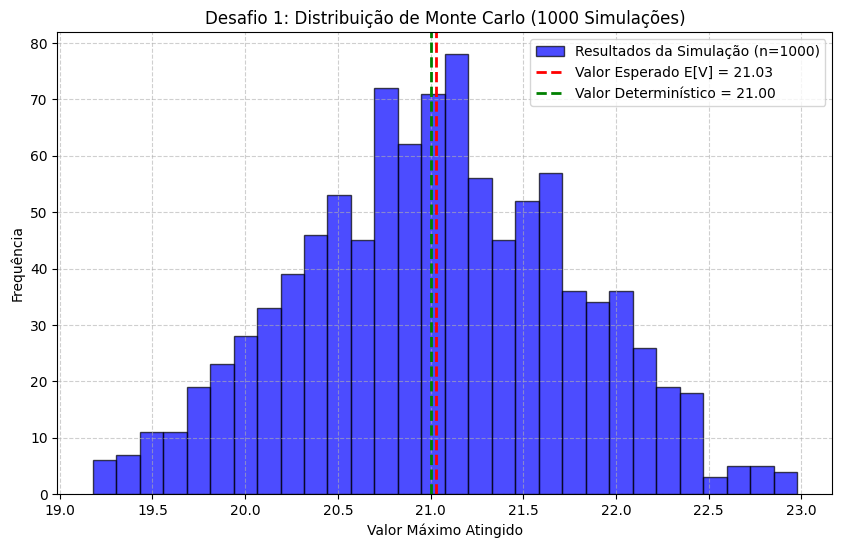



-----------------------------------------------
---------------- DESAFIO 2 ------------------

--- DESAFIO 2 (Verificação Crítica) ---

--- INICIANDO VALIDAÇÃO DO GRAFO ---
[VALIDAÇÃO OK] Nenhum nó órfão detectado.
[VALIDAÇÃO OK] Nenhum ciclo detectado (Grafo Acíclico Direcionado - DAG).
--- VALIDAÇÃO DO GRAFO CONCLUÍDA: SUCESSO ---
Total de permutações calculadas: 120

--- 3 Melhores Ordens (Menor Custo de Tempo) ---
1. Ordem: ('S3', 'S5', 'S7', 'S8', 'S9') -> Custo Total (Tempo): 550h
2. Ordem: ('S3', 'S5', 'S7', 'S9', 'S8') -> Custo Total (Tempo): 550h
3. Ordem: ('S3', 'S5', 'S8', 'S7', 'S9') -> Custo Total (Tempo): 550h

--- 3 Piores Ordens (Maior Custo de Tempo) ---
120. Ordem: ('S9', 'S8', 'S7', 'S5', 'S3') -> Custo Total (Tempo): 550h
119. Ordem: ('S9', 'S8', 'S7', 'S3', 'S5') -> Custo Total (Tempo): 550h
118. Ordem: ('S9', 'S8', 'S5', 'S7', 'S3') -> Custo Total (Tempo): 550h

Justificativa da Heurística:
A análise das 120 permutações mostra um resultado contra-intuitivo: toda

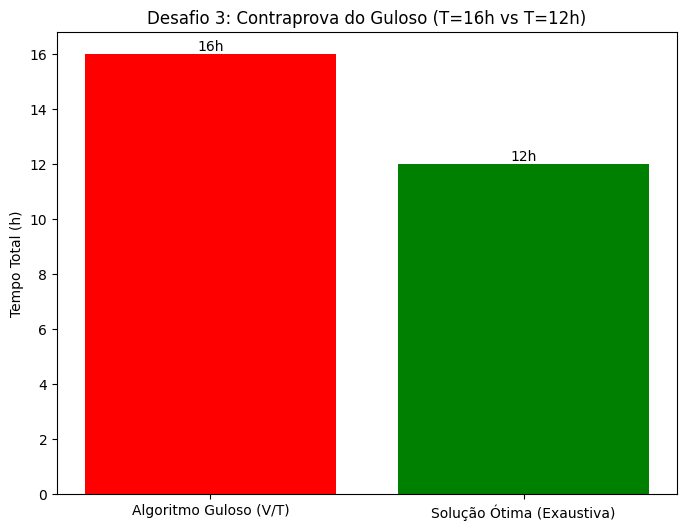



-----------------------------------------------
---------------- DESAFIO 4 ------------------

--- DESAFIO 4 (Trilhas Paralelas - Sorting) ---
Justificativa: Merge Sort. Complexidade garantida O(n log n).
[Merge Sort Próprio] Tempo: 0.033601 ms
[Sort Nativo (Timsort)] Tempo: 0.008646 ms

Sprint A (1-6): ['H12', 'S2', 'S1', 'S5', 'S8', 'H10']
Sprint B (7-12): ['S7', 'S9', 'H11', 'S3', 'S4', 'S6']

Lista Ordenada por Complexidade (C):
  H12 (Introdução a IoT): C=3
  S2 (Modelagem de Dados (SQL)): C=3
  S1 (Programação Básica (Python)): C=4
  S5 (Visualização de Dados (BI)): C=5
  S8 (APIs e Microsserviços): C=6
  H10 (Segurança de Dados): C=6
  S7 (Estruturas em Nuvem (AWS/Azure)): C=7
  S9 (DevOps & CI/CD): C=8
  H11 (Análise de Big Data): C=8
  S3 (Algoritmos Avançados): C=8
  S4 (Fundamentos de ML): C=9
  S6 (IA Generativa Ética): C=10


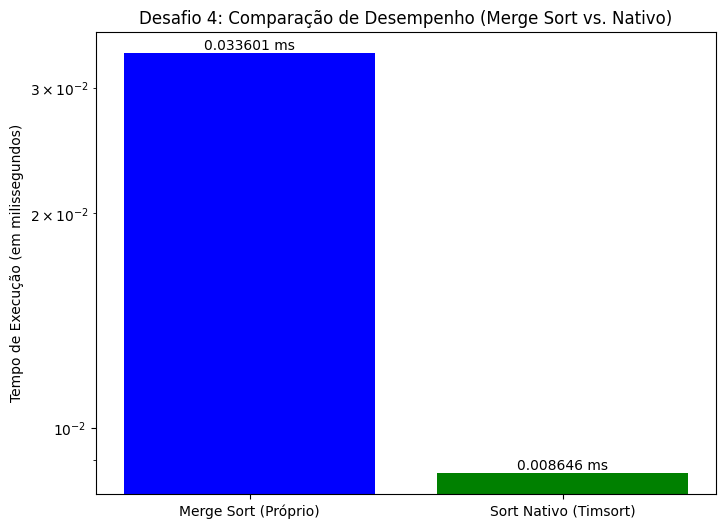



-----------------------------------------------
---------------- DESAFIO 5 ------------------

--- DESAFIO 5 (Recomendação) ---
Buscando recomendações para o perfil: {'S2', 'S1'}

--- Top 3 Recomendações ---
  1. S3 (Algoritmos Avançados) - Valor: 7
  2. S8 (APIs e Microsserviços) - Valor: 6
  3. S5 (Visualização de Dados (BI)) - Valor: 6


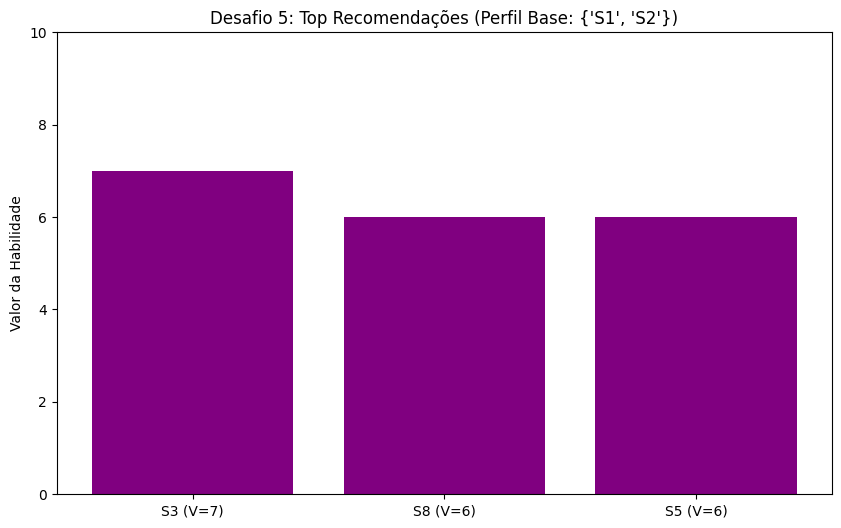


--- DESAFIO 5 (Recomendação) ---
Buscando recomendações para o perfil: {'S7', 'S2', 'S1', 'S3', 'S5'}

--- Top 3 Recomendações ---
  1. S4 (Fundamentos de ML) - Valor: 8
  2. S8 (APIs e Microsserviços) - Valor: 6
  3. H10 (Segurança de Dados) - Valor: 5


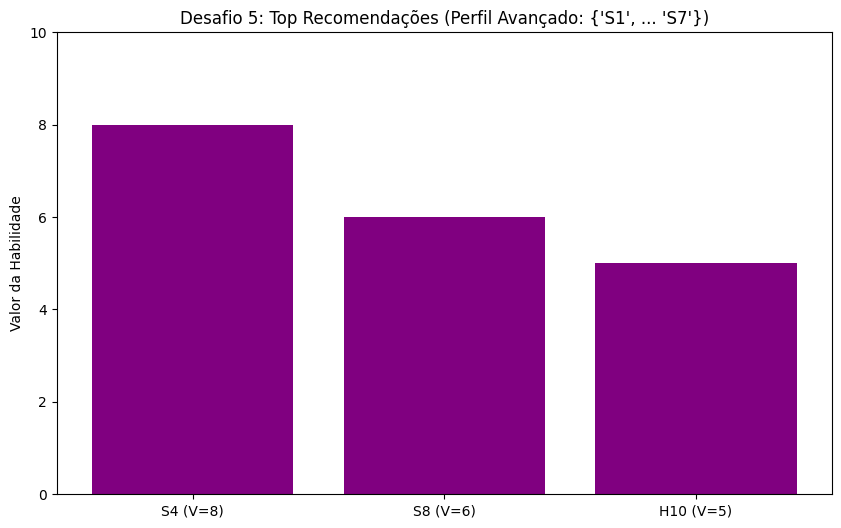


=== EXECUÇÃO COMPLETA DO MOH CONCLUÍDA ===


In [24]:
import matplotlib.pyplot as plt
import numpy as np

# --- DEFINIÇÃO DAS FUNÇÕES DE GRÁFICO ---

def gerar_grafico_desafio1(valores_mc, valor_det):
    """Gera um HISTOGRAMA da simulação de Monte Carlo."""
    plt.figure(figsize=(10, 6))
    plt.hist(valores_mc, bins=30, alpha=0.7, label='Resultados da Simulação (n=1000)', color='blue', edgecolor='black')
    e_v = np.mean(valores_mc)
    plt.axvline(e_v, color='red', linestyle='dashed', linewidth=2, label=f'Valor Esperado E[V] = {e_v:.2f}')
    plt.axvline(valor_det, color='green', linestyle='dashed', linewidth=2, label=f'Valor Determinístico = {valor_det:.2f}')
    plt.title('Desafio 1: Distribuição de Monte Carlo (1000 Simulações)')
    plt.xlabel('Valor Máximo Atingido')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def gerar_grafico_desafio3(tempo_guloso, tempo_otimo):
    """Gera um GRÁFICO DE BARRAS da contraprova do Guloso."""
    plt.figure(figsize=(8, 6))
    nomes = ['Algoritmo Guloso (V/T)', 'Solução Ótima (Exaustiva)']
    tempos = [tempo_guloso, tempo_otimo]
    bars = plt.bar(nomes, tempos, color=['red', 'green'])
    plt.ylabel('Tempo Total (h)')
    plt.title('Desafio 3: Contraprova do Guloso (T=16h vs T=12h)')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}h', va='bottom', ha='center')
    plt.show()

def gerar_grafico_desafio4(tempo_proprio, tempo_nativo):
    """Gera um GRÁFICO DE BARRAS comparando os tempos de sort."""
    nomes_algoritmos = ['Merge Sort (Próprio)', 'Sort Nativo (Timsort)']
    tempos_ms = [tempo_proprio, tempo_nativo]
    plt.figure(figsize=(8, 6))
    bars = plt.bar(nomes_algoritmos, tempos_ms, color=['blue', 'green'])
    plt.ylabel('Tempo de Execução (em milissegundos)')
    plt.title('Desafio 4: Comparação de Desempenho (Merge Sort vs. Nativo)')
    plt.yscale('log') # Escala logarítmica
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.6f} ms', va='bottom', ha='center')
    plt.show()

def gerar_grafico_desafio5(titulo, recomendacoes):
    """Gera GRÁFICOS DE BARRAS para as recomendações do Desafio 5."""
    nomes_p1 = [f"{rec[0]} (V={rec[1]})" for rec in recomendacoes]
    valores_p1 = [rec[1] for rec in recomendacoes]
    plt.figure(figsize=(10, 6))
    plt.bar(nomes_p1, valores_p1, color='purple')
    plt.title(f'Desafio 5: Top Recomendações ({titulo})')
    plt.ylabel('Valor da Habilidade')
    plt.ylim(0, 10) # Define um eixo Y fixo de 0 a 10
    plt.show()


# --- EXECUÇÃO PRINCIPAL E INTERCALADA ---

def main_exec_final_com_graficos():
    print("===============================================")
    print("=== INICIANDO EXECUÇÃO COMPLETA DO MOH (COM GRÁFICOS) ===")
    print("===============================================")

    # 1. Inicializar o Motor
    moh = MotorOrientacaoHabilidades(DATASET_MESTRE)

    # 2. Executar Validação Obrigatória
    if not moh.validar_grafo():
        print("\n[FALHA] O grafo é inválido. Corrija o dataset antes de continuar.")
        return

    # 3. Definir estado inicial e restrições
    habilidades_atuais_zero = set()
    alvo_final = 'S6'
    max_t, max_c = 350, 30

    # --- Desafio 1 (Texto e Gráfico) ---
    print("\n\n-----------------------------------------------")
    print("---------------- DESAFIO 1 ------------------")
    valor_det, _ = moh.resolver_desafio1_deterministico(alvo_final, max_t, max_c, habilidades_atuais_zero)
    valores_mc = moh.resolver_desafio1_monte_carlo(alvo_final, max_t, max_c, habilidades_atuais_zero, n_simulacoes=1000)
    if valores_mc:
        gerar_grafico_desafio1(valores_mc, valor_det=valor_det)

    # --- Desafio 2 (Somente Texto) ---
    print("\n\n-----------------------------------------------")
    print("---------------- DESAFIO 2 ------------------")
    moh.resolver_desafio2(habilidades_atuais_zero)

    # --- Desafio 3 (Texto e Gráfico) ---
    print("\n\n-----------------------------------------------")
    print("---------------- DESAFIO 3 ------------------")
    moh.resolver_desafio3(valor_alvo=15)
    t_guloso, t_otimo = moh.demonstrar_contraexemplo_desafio3(valor_alvo=20)
    gerar_grafico_desafio3(t_guloso, t_otimo)

    # --- Desafio 4 (Texto e Gráfico) ---
    print("\n\n-----------------------------------------------")
    print("---------------- DESAFIO 4 ------------------")
    tempo_proprio, tempo_nativo, _ = moh.resolver_desafio4()
    gerar_grafico_desafio4(tempo_proprio, tempo_nativo)

    # --- Desafio 5 (Texto e Gráficos) ---
    print("\n\n-----------------------------------------------")
    print("---------------- DESAFIO 5 ------------------")
    perfil_teste_d5 = {'S1', 'S2'}
    recs_p1 = moh.resolver_desafio5(perfil_teste_d5)
    gerar_grafico_desafio5("Perfil Base: {'S1', 'S2'}", recs_p1)

    perfil_avancado_d5 = {'S1', 'S3', 'S2', 'S5', 'S7'}
    recs_p2 = moh.resolver_desafio5(perfil_avancado_d5)
    gerar_grafico_desafio5("Perfil Avançado: {'S1', ... 'S7'}", recs_p2)

# Executa a função principal
main_exec_final_com_graficos()

print("\n===============================================")
print("=== EXECUÇÃO COMPLETA DO MOH CONCLUÍDA ===")
print("===============================================")